# Data Dashboard

Dieses Jupyter Notebook beinhaltet Analysen des Datensatzes. Im ersten Abschnitt findest du die Berechnungen einiger Kenngrößen. Im zweiten Abschnitt findest du verschiedene grundlegende Visualisierungen der Daten.<br/>

Die erste Codezelle liest die Daten ein und bereinigt sie. Daher musst du **die erste Codezelle immer ausführen, wenn du
das Notebook neu öffnest**.

#### Da der Datensatz für die Visualisierungen, die wir bisher erstellen können, zu groß ist, musst du ihn über schranke_filme und schranke_nutzer etwas einschränken. Probiere gerne aus, wie sich diese Einschränkungen auswirken. 

In [28]:
schranke_filme = 100
schranke_nutzer = 100

import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime

ratings = pd.read_csv(r'ratings.csv',encoding='latin-1')
movies = pd.read_csv(r'movies.csv',encoding='latin-1')

movies = movies[movies['movieId']<schranke_filme]
ratings = ratings[ratings['userId']<schranke_nutzer]
ratings = ratings[ratings['userId']<schranke_nutzer]

movies['year'] = movies['title'].str.extract('\(([\d]{4})\)')
movies['title'] = movies['title'].str.replace(r'\([\d]*\)', '').str.strip()
movies['year'] = movies['year'].fillna(0)
movies['year'] = movies['year'].astype('int')

total = pd.merge(movies,ratings,left_on=['movieId'],
              right_on=['movieId'],
              how='inner')

## ----- Datensatz anschauen --------------------------------------------------------------------------------------------
Du kannst dir den Datensatz anschauen, indem du in die folgende Codezelle 'movies', 'ratings' oder 'total' einträgst und die Codezelle ausführst.

In [29]:
total

movieId             title                                       genres  \
0          1         Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
1          1         Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
2          1         Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
3          1         Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
4          1         Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
..       ...               ...                                          ...   
423       95      Broken Arrow                    Action|Adventure|Thriller   
424       97  Hate (Haine, La)                                  Crime|Drama   
425       97  Hate (Haine, La)                                  Crime|Drama   
426       97  Hate (Haine, La)                                  Crime|Drama   
427       97  Hate (Haine, La)                                  Crime|Drama   

     year  userId  rating   timestamp  
0    1995       2     3.5  1141415820  
1    1995       3     4.0  1439472215  
2    1995       4     3.0  1573944252  
3    1995       5     4.0   858625949  
4    1995       8     4.0   890492517  
..    ...     ...     ...         ...  
423  1996      90     5.0   863538044  
424  1995      12     4.0   963590948  
425  1995      37     4.5  1456485407  
426  1995      57     4.5  1221520649  
427  1995      62     4.5  1148504525  

[428 rows x 7 columns]

## ----- Datensatz Kennzahlen -------------------------------------------------------------------------------------------
Für einen ersten groben Überblick über die Daten, berechnen wir zunächst ein paar Kennzahlen.<br/>
Mit dem folgenden Code kannst du dir für jede Spalte im Datensatz die konkreten Einträge, sowie die Anzahl an Einträgen ausgeben lassen. Ändere dafür den Namen der Spalte im Code.

In [30]:
print('Einträge im Datensatz:', total['rating'].unique())
print('Anzahl an Einträgen im Datensatz:', len(total['rating'].unique()))

Einträge im Datensatz: [3.5 4.  3.  5.  2.  2.5 1.  1.5 4.5 0.5]
Anzahl an Einträgen im Datensatz: 10


Wie du vielleicht gemerkt hast, funktioniert der obige Befehl für die einzelnen Genre nicht so gut, da sie in einem einzelnen String in der Spalte angegeben sind. Dafür hilft dir die folgende Codezelle.

In [31]:
print('Verschiedene Genre:', movies['genres'].str.split(pat = '|', expand = False).explode().unique())
print('Anzahl verschiedener Genre:', len(movies['genres'].str.split(pat = '|', expand = False).explode().unique()))

Verschiedene Genre: ['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical']
Anzahl verschiedener Genre: 17


Nun wissen wir, wie viele verschiedene Einträge unser Datensatz hat. Daraus ziehen wir eine wichtige Information, die in der folgenden Codezelle berechnet wird: **Welche ist das?**

In [32]:
print(len(total)/(len(total['userId'].unique())*(len(total['movieId'].unique()))))

0.08573717948717949


Über die Ratings wollen wir noch genauere Kennzahlen, wie das minimale (*min*) und maximale Rating (*max*), den <a href="https://de.statista.com/statistik/lexikon/definition/85/median/">Median</a> (*50%*) und den <a href="https://de.statista.com/statistik/lexikon/definition/91/mittelwert_und_arithmetisches_mittel/#:~:text=Der%20Mittelwert%20beschreibt%20den%20statistischen,durch%20die%20Anzahl%20aller%20Werte.">Durchschnitt</a> (*mean*).<br/>
(*Für was könnten die anderen Abkürzungen in der unteren Ausgabe stehen?*)

In [33]:
total['rating'].describe()

count    428.00000
mean       3.62500
std        1.01806
min        0.50000
25%        3.00000
50%        4.00000
75%        4.00000
max        5.00000
Name: rating, dtype: float64

## ----- Datensatz Visualisierungen ------------------------------------------------------------------------------------
In diesem Abschnitt des Jupyter Notebooks widmen wir uns der Visualisierung verschiedener Eigenschaften unseres Datensatzes:
<ol>
    <li>Anzahl Filme pro Jahr</li>
    <li>Anzahl Filme pro Genre</li>
    <li>Verteilung der Ratings</li>
    <li>Anzahl Bewertungen pro Film</li>
    <li>Durchschnittliche Bewertung pro Film</li>
    <li>Anzahl Bewertungen pro Nutzer</li>
    <li>Durchschnittliche Bewertung pro Nutzer</li>
    <li>Anzahl Bewertungen pro Genre</li>
</ol>

**Bedienungshinweis:** Zu jeder Eigenschaft findest du im folgenden einen eignenen Abschnitt, der immer nach dem gleichen Muster aufgebaut ist. Zu Beginn steht immer eine Codezelle, die die Datenverarbeitung beinhaltet. **In dieser änderst du bitte nichts!** Danach folgen Codezellen mit verschiedenen Visualisierungstypen. Diese kannst du verändern und so deine gewünschte Visualisierung erzeugen. Dazu kannst du **insbesondere die folgenden Stellen ändern:**<br/>
<ul>
    <li>Stellen an denen xxx, 'xxx' oder 'yyy' steht</li>
    <li>das Array farben = [...] (<a href='https://i.stack.imgur.com/lFZum.png'>diese Farben</a> stehen dir zur Auswahl)</li>
</ul>
***Hinweis: Nicht alle Visualisierungstypen, die hier zur Auswahl stehen, sind für die gegebene Eigenschaft sinnvoll!***

## ----- 1 Anzahl Filme pro Jahr -----

In [34]:
count_year_dict = movies['year'].value_counts().sort_index().to_dict()
names = list(count_year_dict.keys())
values = list(count_year_dict.values())

In [35]:
#Variante 1
movies['year'].value_counts().sort_index().rename_axis('xxx').to_frame('xxx')

xxx
xxx      
1994    4
1995   79
1996   15

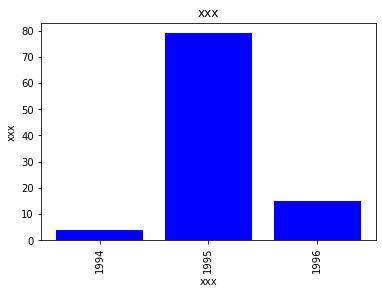

In [36]:
#Variante 2
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','blue']
plt.bar(range(len(count_year_dict)), values, color = farben, tick_label=names)
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.xticks(rotation='vertical')
plt.show()

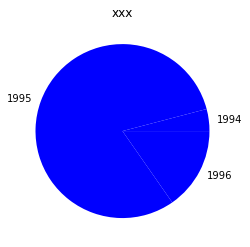

In [37]:
#Variante 3
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','blue']
plt.pie(values, labels = names, colors = farben)
plt.title('xxx')
plt.show()

## ----- 2 Filme pro Genre -----

In [38]:
count_genres_dict = {}
for elem in movies['genres'].str.split(pat = '|', expand = False).explode().unique():
    new = {elem:movies[['genres']]['genres'].str.contains(elem).sum()}
    count_genres_dict.update(new)
names = list(count_genres_dict.keys())
values = list(count_genres_dict.values())

In [39]:
#Variante 1
pd.DataFrame({'xxx': names, 'yyy': values}).style.hide_index()

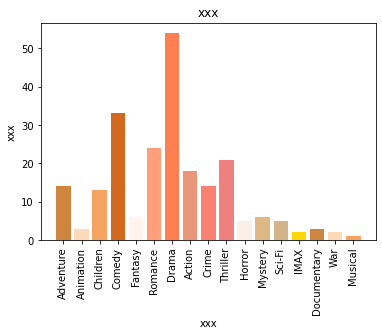

In [40]:
#Variante 2
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.bar(range(len(count_genres_dict)), values, tick_label=names, color=farben)
plt.xticks(rotation='vertical')
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.show()

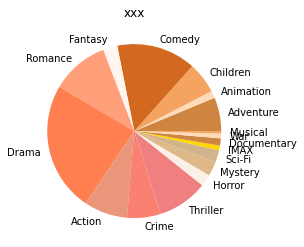

In [41]:
#Variante 3
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.pie(values, labels = names, colors = farben)
plt.title('xxx')
plt.show()

## ----- 3 Verteilung der Ratings -----

In [42]:
count_rating_dict = total['rating'].value_counts().sort_index().to_dict()
names = list(count_rating_dict.keys())
values = list(count_rating_dict.values())

In [43]:
#Variante 1
total['rating'].value_counts().sort_index().rename_axis('xxx').to_frame('xxx')

xxx
xxx     
0.5    2
1.0   14
1.5    2
2.0   30
2.5   10
3.0  109
3.5   24
4.0  133
4.5   29
5.0   75

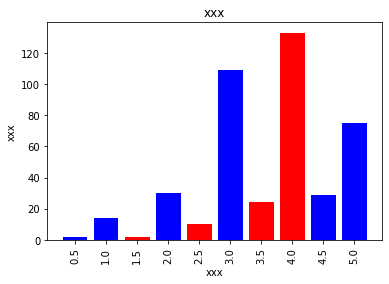

In [44]:
#Variante 2
farben = ['blue','blue','red','blue','red','blue','red','red']
plt.bar(range(len(count_rating_dict)), values, color = farben, tick_label=names)
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.xticks(rotation='vertical')
plt.show()

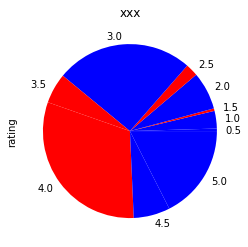

In [45]:
#Variante 3
farben = ['blue','blue','red','blue','red','blue','red','red']
total['rating'].value_counts().sort_index().plot(kind='pie', colors=farben)
plt.title('xxx')
plt.show()

## ----- 4 Anzahl Bewertungen pro Film -----

In [46]:
rating_count = total.groupby(by=['movieId','title']).size().reset_index(name='counts')
rating_count_dict = rating_count[['title','counts']].set_index('title')['counts'].to_dict()
names = list(rating_count_dict.keys())
values = list(rating_count_dict.values())

In [47]:
#Variante 1 (verändere Zahl in head)
xxx = 10
rating_count.sort_values(by = 'counts', ascending=False).head(xxx)

movieId                               title  counts
38       50                 Usual Suspects, The      33
0         1                           Toy Story      31
36       47                Seven (a.k.a. Se7en)      31
26       32  Twelve Monkeys (a.k.a. 12 Monkeys)      23
30       39                            Clueless      20
7        10                           GoldenEye      15
44       62                  Mr. Holland's Opus      14
13       19      Ace Ventura: When Nature Calls      13
62       95                        Broken Arrow      12
1         2                             Jumanji      12

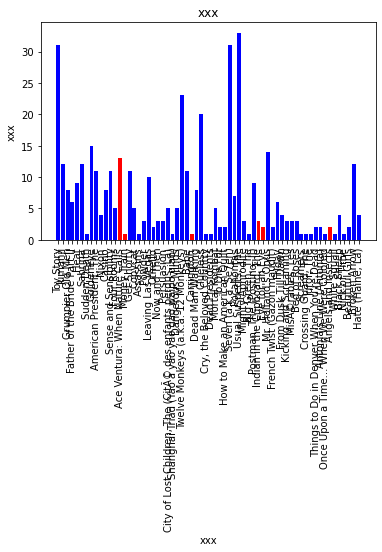

In [48]:
#Variante 2
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red']
plt.bar(range(len(rating_count_dict)), values, color = farben, tick_label=names)
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.xticks(rotation='vertical')
plt.show()

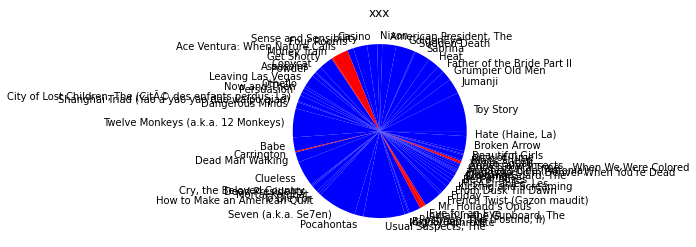

In [49]:
#Variante 3
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red']
plt.pie(values, labels = names, colors = farben)
plt.title('xxx')
plt.show()

## ----- 5 Durchschnittliche Bewertung pro Film -----

In [50]:
rating_mean = total.groupby(by=['movieId','title']).agg({'rating': 'mean'})
rating_mean_dict = rating_mean['rating'].to_dict()
names = list(rating_mean_dict.keys())
values = list(rating_mean_dict.values())

In [51]:
#Variante 1 (verändere Zahl in head)
xxx = 10
rating_mean.sort_values(by = 'rating', ascending=False).head(xxx)

rating
movieId title                                                       
86      White Squall                                        5.000000
83      Once Upon a Time... When We Were Colored            5.000000
36      Dead Man Walking                                    4.562500
82      Antonia's Line (Antonia)                            4.500000
50      Usual Suspects, The                                 4.424242
97      Hate (Haine, La)                                    4.375000
16      Casino                                              4.250000
29      City of Lost Children, The (CitÃ© des enfants p...  4.100000
47      Seven (a.k.a. Se7en)                                4.064516
23      Assassins                                           4.000000

## ----- 6 Anzahl Bewertungen pro Nutzer -----

In [53]:
rating_count_user = total.groupby(by=['userId']).size().reset_index(name='counts')
rating_count_user_dict = rating_count_user[['userId','counts']].set_index('userId')['counts'].to_dict()
names = list(rating_count_user_dict.keys())
values = list(rating_count_user_dict.values())

In [54]:
#Variante 1 
xxx = 10
rating_count_user.sort_values(by = 'counts', ascending=False).head(xxx)

userId  counts
8       12      26
53      72      25
61      80      22
5        8      18
45      61      17
14      23      17
54      73      14
34      47      13
32      43      12
69      90      11

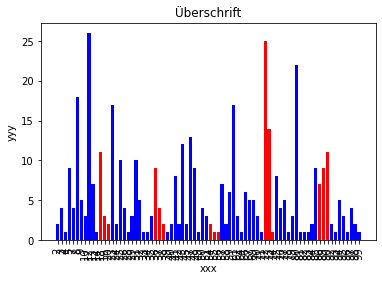

In [55]:
#Variante 2
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red']
plt.bar(range(len(rating_count_user_dict)), values, color = farben, tick_label=names)
plt.title('Überschrift')
plt.xlabel('xxx')
plt.ylabel('yyy')
plt.xticks(rotation='vertical')
plt.show()

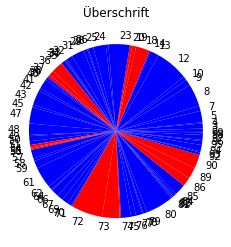

In [56]:
#Variante 3
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red']
plt.pie(values, labels = names, colors = farben)
plt.title('Überschrift')
plt.show()

## ----- 7 Durchschnittliche Bewertung pro Nutzer -----

In [57]:
rating_mean_user = total.groupby(by=['userId']).agg({'rating': 'mean'})
rating_mean_user_dict = rating_mean_user['rating'].to_dict()
names = list(rating_count_user_dict.keys())
values = list(rating_count_user_dict.values())

In [58]:
#Variante 1
xxx = 10
rating_mean_user.sort_values(by = 'rating', ascending=False).head(xxx)

rating
userId        
71       5.000
14       5.000
93       5.000
96       5.000
45       5.000
42       5.000
28       5.000
76       4.625
37       4.625
58       4.500

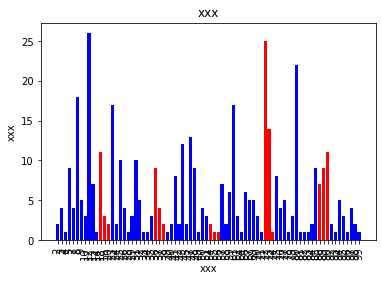

In [59]:
#Variante 2
farben = ['blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','red','red','red']
plt.bar(range(len(rating_mean_user_dict)), values, color = farben, tick_label=names)
plt.title('xxx')
plt.xlabel('xxx')
plt.ylabel('xxx')
plt.xticks(rotation='vertical')
plt.show()

## ----- 8 Anzahl Bewertungen pro Genre -----

In [60]:
count_genresrating_dict = {}
for elem in movies['genres'].str.split(pat = '|', expand = False).explode().unique():
    new = {elem:total[['genres']]['genres'].str.contains(elem).sum()}
    count_genresrating_dict.update(new)
names = list(count_genresrating_dict.keys())
values = list(count_genresrating_dict.values())

In [61]:
#Variante 1
pd.DataFrame({'xxx': names, 'yyy': values}).style.hide_index()

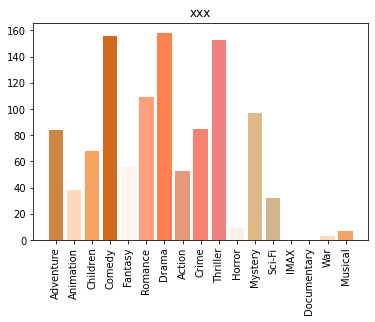

In [62]:
#Variante 2
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.bar(range(len(count_genresrating_dict)), values, tick_label=names, color=farben)
plt.xticks(rotation='vertical')
plt.title('xxx')
plt.show()

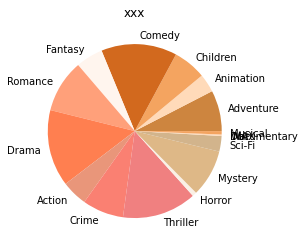

In [63]:
#Variante 3
farben = ['peru', 'peachpuff', 'sandybrown', 'chocolate','seashell', 'lightsalmon', 'coral', 'darksalmon','salmon', 'lightcoral', 'linen', 'burlywood', 'tan', 'gold']
plt.pie(values, labels = names, colors = farben)
plt.title('xxx')
plt.show()